In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


**Loading the Dataset**

In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Train a Decision Tree Classifier and Visualize the Tree**

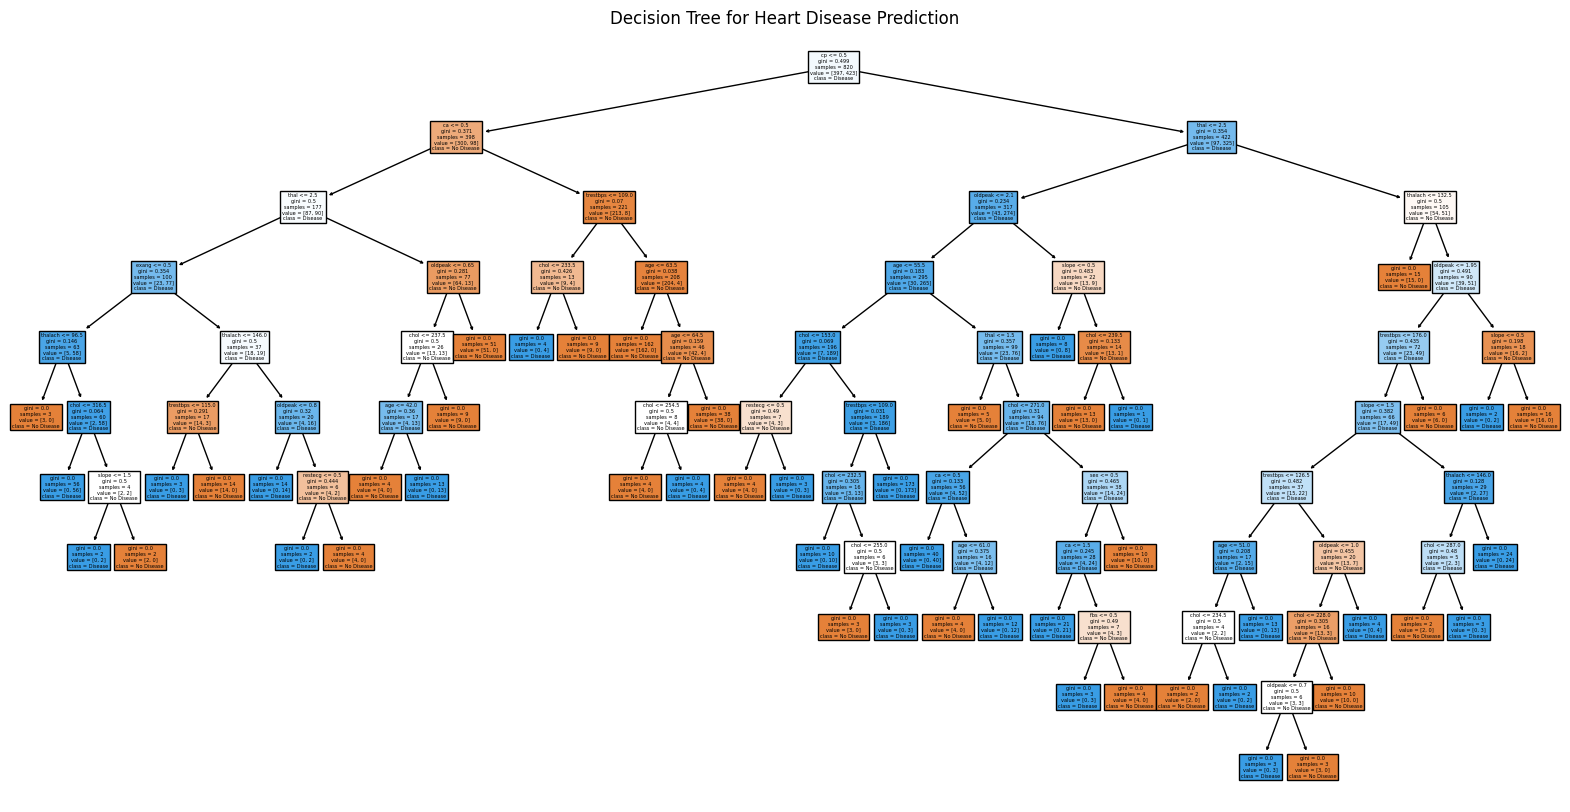

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = df.drop("target", axis=1)
y = df["target"]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()


**Analyze Overfitting and Control Tree Depth**

Decision Trees can overfit easily by growing too deep. Let's:

- Compare training and test accuracy of a full tree (default)

- Control overfitting using max_depth

- Find optimal depth

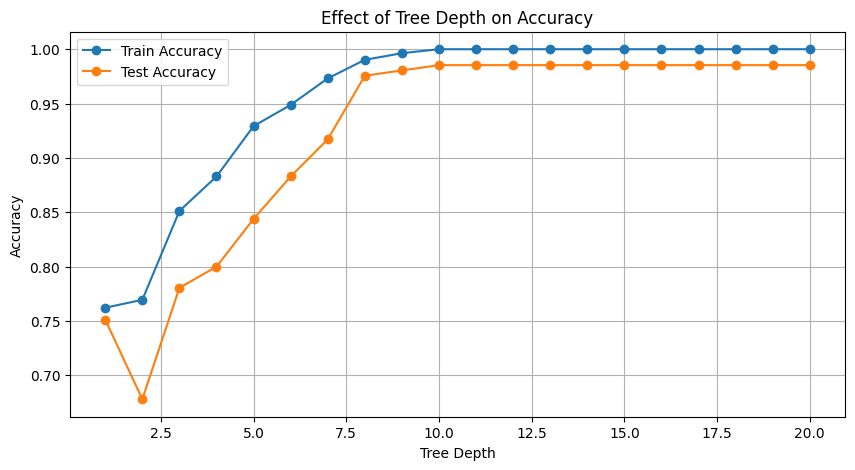

(None, (1.0, 0.9853658536585366))

In [8]:
from sklearn.metrics import accuracy_score

# Accuracy of the full (unrestricted) tree
train_acc_full = accuracy_score(y_train, dt_model.predict(X_train))
test_acc_full = accuracy_score(y_test, dt_model.predict(X_test))

# Now let's try different tree depths and track performance
depths = list(range(1, 21))
train_accuracies = []
test_accuracies = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Tree Depth on Accuracy')
plt.legend()
plt.grid(True)
plt.show(), (train_acc_full, test_acc_full)


**Train a Random Forest and Compare Accuracy**

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Accuracy
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

rf_train_acc, rf_test_acc


(1.0, 0.9853658536585366)

**Other Analysis**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Accuracy
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print("Random Forest Train Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)


Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9853658536585366


**Interpret Feature Importances**

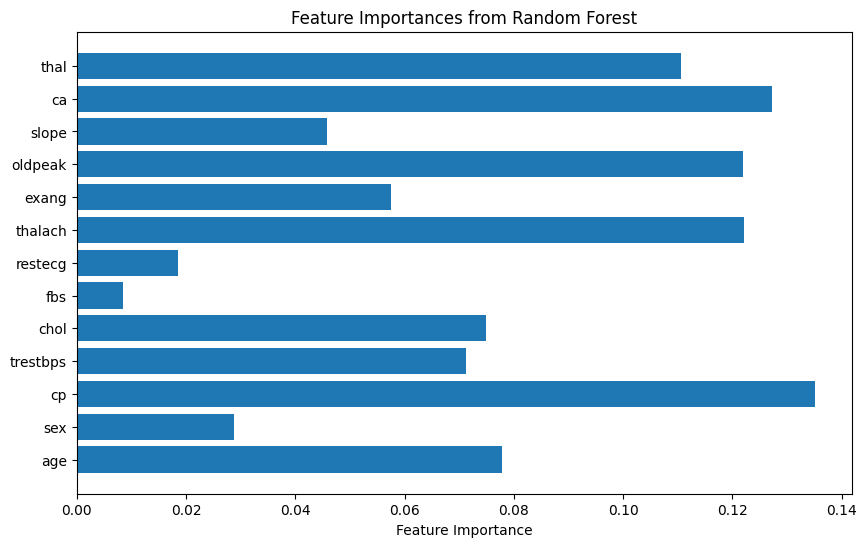

In [11]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Random Forest")
plt.show()


**Evaluate Using Cross-Validation**

In [12]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9970731707317073
